## IA PROJECT ##

### Attribute and object selection ###

We want to do a study on environmental aspect, and "other thing to find". That's why we collected some data on online databank, to make some analysis on it. But first we will need to select the data and adapt it in a way to study it easily.

Loading of all packages we need

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import data_managment as dm
import numpy as np
import seaborn
from outliers import smirnov_grubbs as grubbs


We bering with the import of our dataframe, and the adaption for it to our study

In [28]:
importlib.reload(dm)
originial_df = pd.read_csv("data3.txt", sep="\t")
# df = dm.build_adapted_df(originial_df);df
originial_df.drop(["Country Code", "Time Code","Time"], axis=1, inplace = True)
originial_df.set_index("Country Name", inplace = True)
originial_df[originial_df == ".."] = np.nan
df = originial_df.copy().astype(np.float64)


We can see there are many NaN : We can chose first to eleminate country with many NaN data (over 50% for example) that can bring outlier. But that value can be chose with the following graphic

                                                  NaN_count
Net migration                                             5
Life expectancy at birth, total (years)                  16
GDP per capita (current US$)                             13
Urban population (% of total population)                  7
Access to electricity (% of population)                   6
Individuals using the Internet (% of population)         19


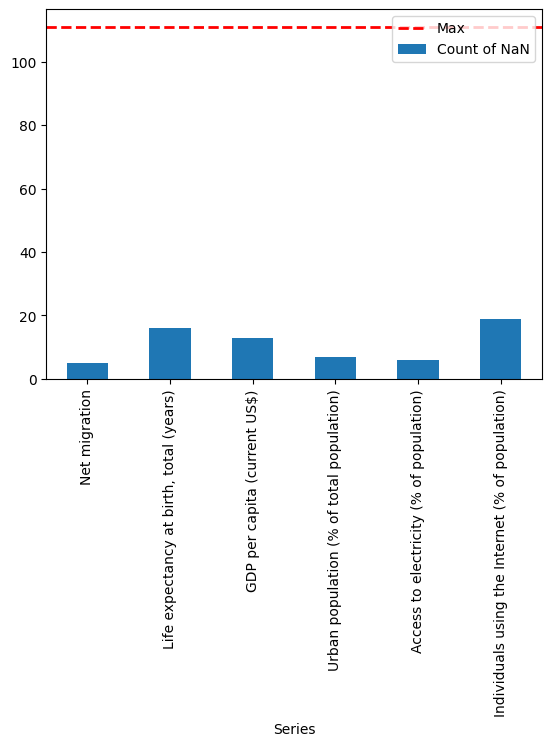

In [29]:
importlib.reload(dm)

df_nb_nan = dm.make_na_count(df,True); print(df_nb_nan)
df_nb_nan["Series"] = df_nb_nan.index
df_nb_nan.plot.bar(y="NaN_count", x = "Series",  label="Count of NaN")
max_nan = df.shape[0]*0.5
plt.axhline(max_nan, color='r', linestyle='dashed', linewidth=2, label="Max")
plt.legend(loc='upper right')

So we delete all series with more that 50% of outliers, meaning thats don't bring enough information to be intersting

In [30]:
importlib.reload(dm)

df_without_na_series = dm.del_many_na_series(df, df_nb_nan, max_nan)

Now, we will check if some country still go NaN values

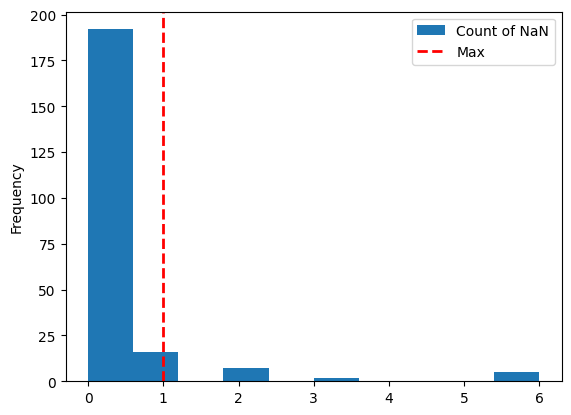

In [31]:
importlib.reload(dm)

df_nb_nan_s = dm.make_na_count(df,False)
df_nb_nan_s["Series"] = df_nb_nan_s.index 
df_nb_nan_s.plot.hist(y="NaN_count",  label="Count of NaN")
max_nan_s = 1
plt.axvline(max_nan_s, color='r', linestyle='dashed', linewidth=2, label="Max")
plt.legend(loc='upper right')

Few country has been removed because still presence of NaN values. 

In [43]:
importlib.reload(dm)

df_without_na_country = dm.del_many_na_country(df_without_na_series, df_nb_nan_s, max_nan_s);df_without_na_country

,Net migration,"Life expectancy at birth, total (years)",GDP per capita (current US$),Urban population (% of total population),Access to electricity (% of population),Individuals using the Internet (% of population)
Country Name,,,,,,
Afghanistan,-90238.0,63.136000,520.252064,25.020,97.699997,11.000000
Albania,-10887.0,78.860000,4124.055390,58.421,99.889999,59.600000
Algeria,-36227.0,75.732000,3967.199451,71.459,99.350250,42.945527
Angola,91623.0,61.092000,1709.515534,64.149,41.813129,23.200000
Antigua and Barbuda,16.0,78.152000,15862.651663,24.846,100.000000,73.000000
...,...,...,...,...,...,...
Virgin Islands (U.S.),-526.0,79.168293,35324.974887,95.480,100.000000,59.608316
West Bank and Gaza,-22774.0,74.554000,3527.613824,75.628,100.000000,59.900000
"Yemen, Rep.",-39688.0,66.064000,1069.817122,35.394,68.859505,24.579208


But we can also replace NaN value by using a clustering estimation by this formula

In [42]:
df_nan_estimate = dm.replace_nan_knn(df_without_na_series); df_nan_estimate ###TODO: A garder ?

,Net migration,"Life expectancy at birth, total (years)",GDP per capita (current US$),Urban population (% of total population),Access to electricity (% of population),Individuals using the Internet (% of population)
Country Name,,,,,,
Afghanistan,-90238.000000,63.136000,520.252064,25.020000,97.699997,11.000000
Albania,-10887.000000,78.860000,4124.055390,58.421000,99.889999,59.600000
Algeria,-36227.000000,75.732000,3967.199451,71.459000,99.350250,42.945527
American Samoa,-1641.000000,77.579327,13300.824611,87.198000,88.592147,79.541203
Andorra,1303.000000,80.498766,39932.164487,88.248000,100.000000,89.700000
...,...,...,...,...,...,...
NaN,-125.009217,72.412814,16923.982996,60.215177,84.476750,51.435006
NaN,-125.009217,72.412814,16923.982996,60.215177,84.476750,51.435006
NaN,-125.009217,72.412814,16923.982996,60.215177,84.476750,51.435006


We will now check about coreleted data, to do this spearman test is done.

Maintenant on regarde si des données sont corrélé :

<AxesSubplot: >

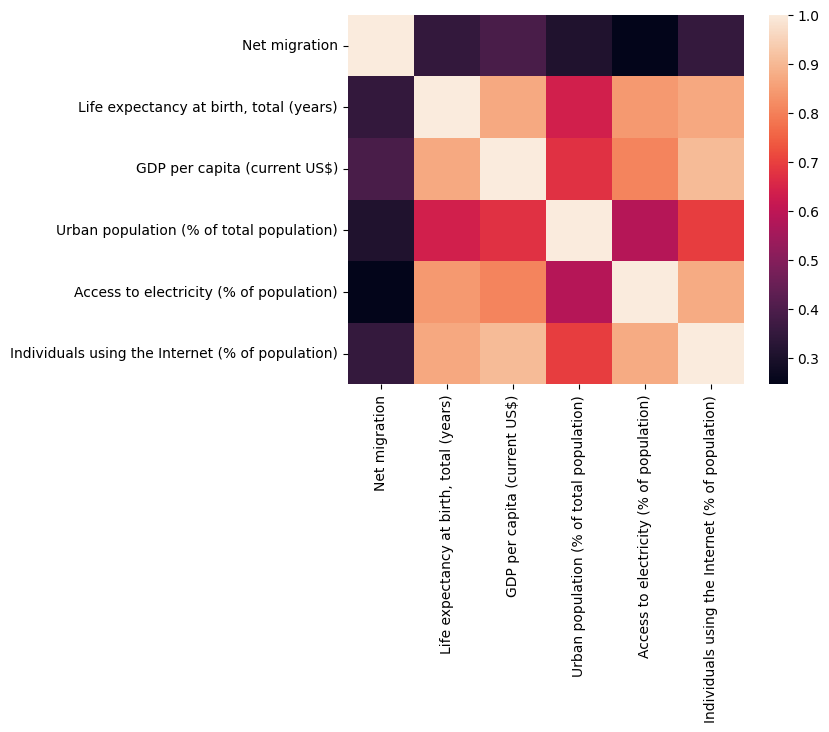

In [34]:
df_corr = df_nan_estimate.corr("spearman", numeric_only = True)
seaborn.heatmap(df_corr)

We this heatmap about contengensis table establish the different possible relation, that we will delete one of the variable when there is 90% absolute correlation effect.
That will be done for both dataframe we have.

<AxesSubplot: >

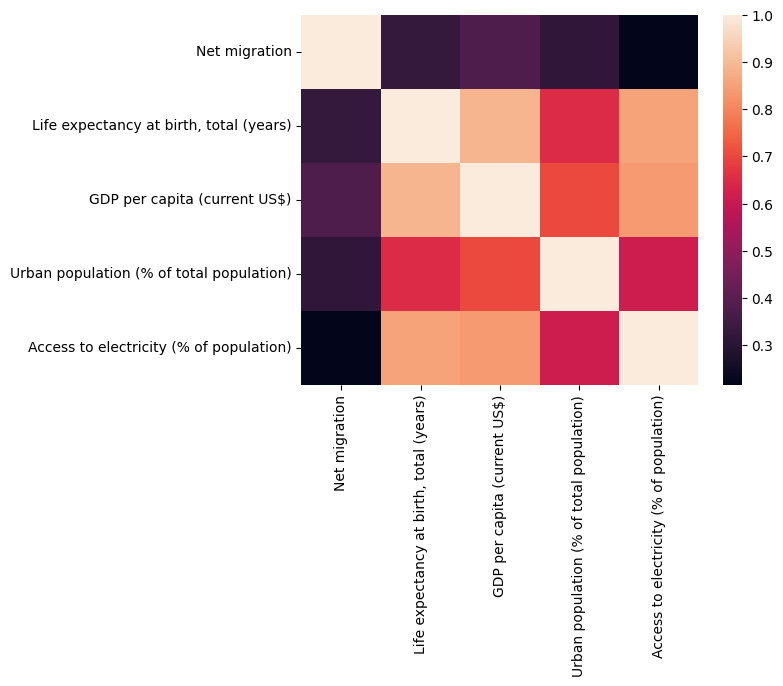

In [38]:
importlib.reload(dm)
df_without_corr_series = dm.del_correled_series(df_without_na_country, df_corr,0.90)
df_nan_estimate_without_corr_series = dm.del_correled_series(df_nan_estimate, df_corr,0.90)
corr_clean = df_without_corr_series.corr("spearman")
seaborn.heatmap(corr_clean)

On compare les deux technique d'élimination des NA : 

In [ ]:
df_without_corr_series.corrwith(df_nan_estimate_without_corr_series)

On voit que la correlation entre les deux graphiques sont totales donc pas d'effet

At this step, all data that we considered as useless (with nan values, or correlated data are delete). Because of the variaty of our variable units, but also order of magnitude. We should normalize or data to simplify the Visualization.

In [39]:
importlib.reload(dm)
n_df = dm.normalize_df(df_without_corr_series)
dm.export_clean_data(df_without_corr_series)
dm.export_clean_data(n_df,"normalized_dataframe.csv")


Lets check if our dataframe contain many outlier.

<AxesSubplot: >

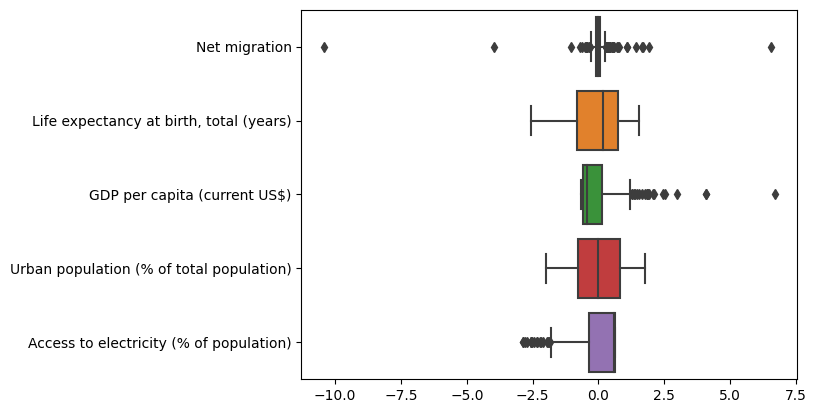

In [40]:
seaborn.boxplot(data=n_df, orient = "h")

We can see on the plot that there are many outlier, let check if they are stastically significant.

In [41]:
outliers_data = {}
for serie in n_df:
    val = np.array(n_df[serie])
    outl = grubbs.max_test_outliers(val, alpha=0.05)
    print(f"We have found {len(outl)} outliers in the series : {serie}")
    outliers_data[serie] = outl

We have found 1 outliers in the series : Net migration
We have found 0 outliers in the series : Life expectancy at birth, total (years)
We have found 6 outliers in the series : GDP per capita (current US$)
We have found 0 outliers in the series : Urban population (% of total population)
We have found 0 outliers in the series : Access to electricity (% of population)


Thanks to the Grubbs test, we have found differents outliers on our subdataset. We chose to don't change the reality of our data and so to delete it, but depending on the result we obtain, we can maybe do it to see if there is big change (For example when really big outliars can hide some behaviour in the clusturing). This outliers will also be tested, with an other test during the clusturing.

In [ ]:
#TODO: delet outliers ?